In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('data_4/winequality-white.csv', sep=';')

In [42]:
data.shape

(4898, 12)

In [43]:
print (data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [44]:
X = data.drop(['quality'], axis = 1)

In [45]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [46]:
y = data['quality']

In [47]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

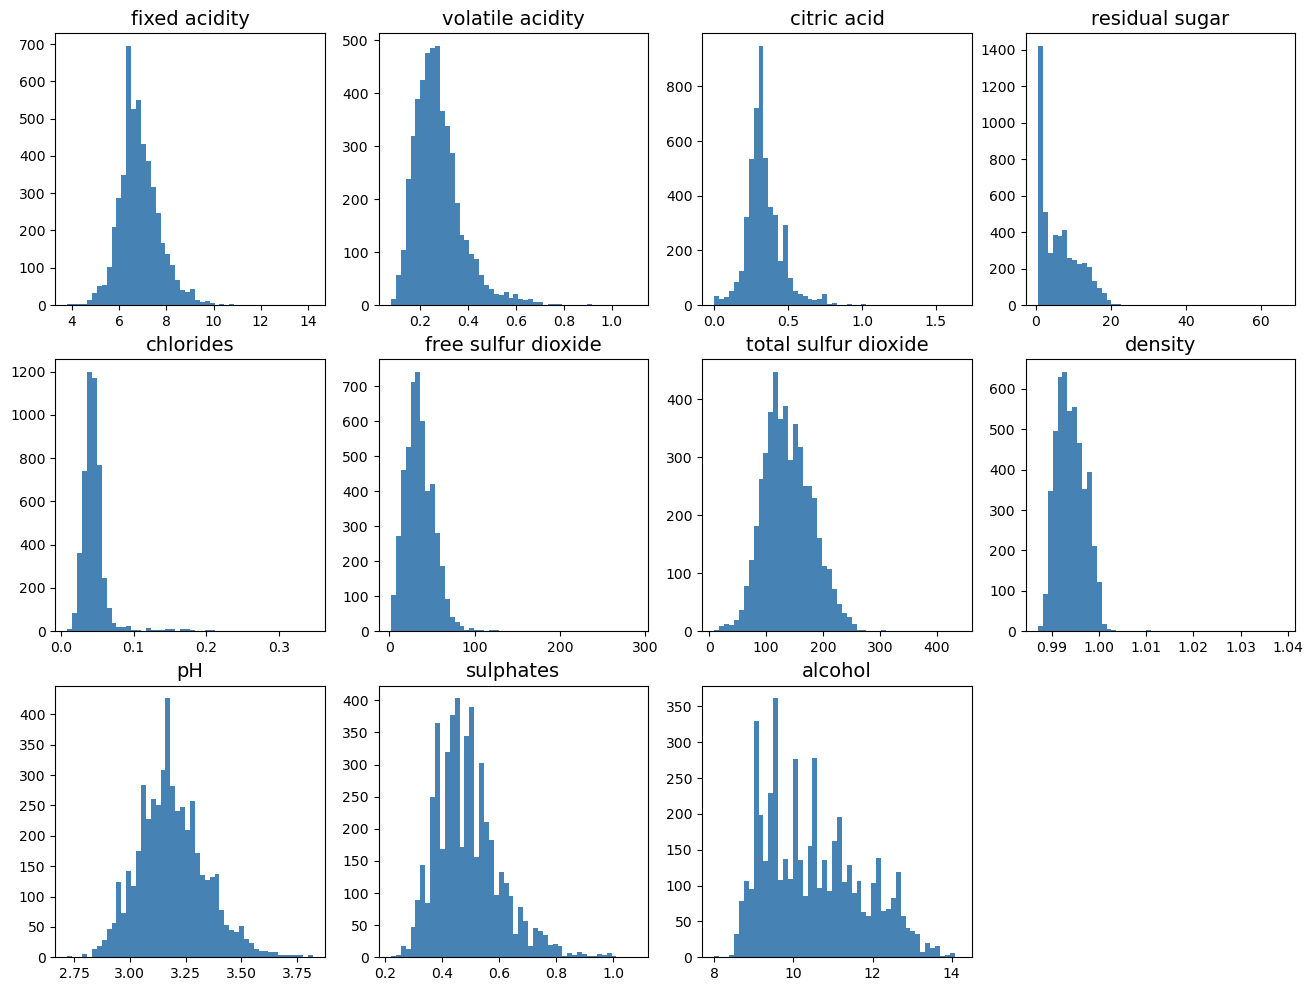

In [62]:
fig = plt.figure(figsize=(16,12))

for feat_idx in range (X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx + 1))
    h = ax.hist(X.iloc[:, feat_idx], bins =50, color= 'steelblue', edgecolor= 'none')
    ax.set_title(data.columns[feat_idx], fontsize = 14)

In [63]:
x_coor = range(np.min(y), np.max(y))
x_coor

range(3, 9)

<BarContainer object of 6 artists>

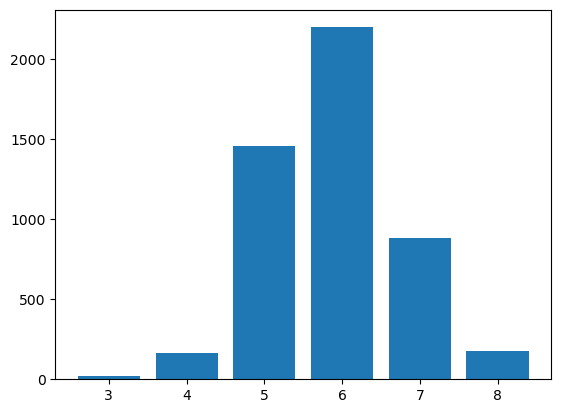

In [65]:
plt.bar(x_coor, [(x == y).sum() for x in x_coor ] )

In [66]:
y_class = np.where( y<6, 0, 1)

In [68]:
y_class[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [70]:
y_class[y_class == 1].shape

(3258,)

In [71]:
y_class[y_class == 0].shape

(1640,)

In [72]:
from sklearn import model_selection

In [73]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

In [74]:
from sklearn import preprocessing

In [75]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

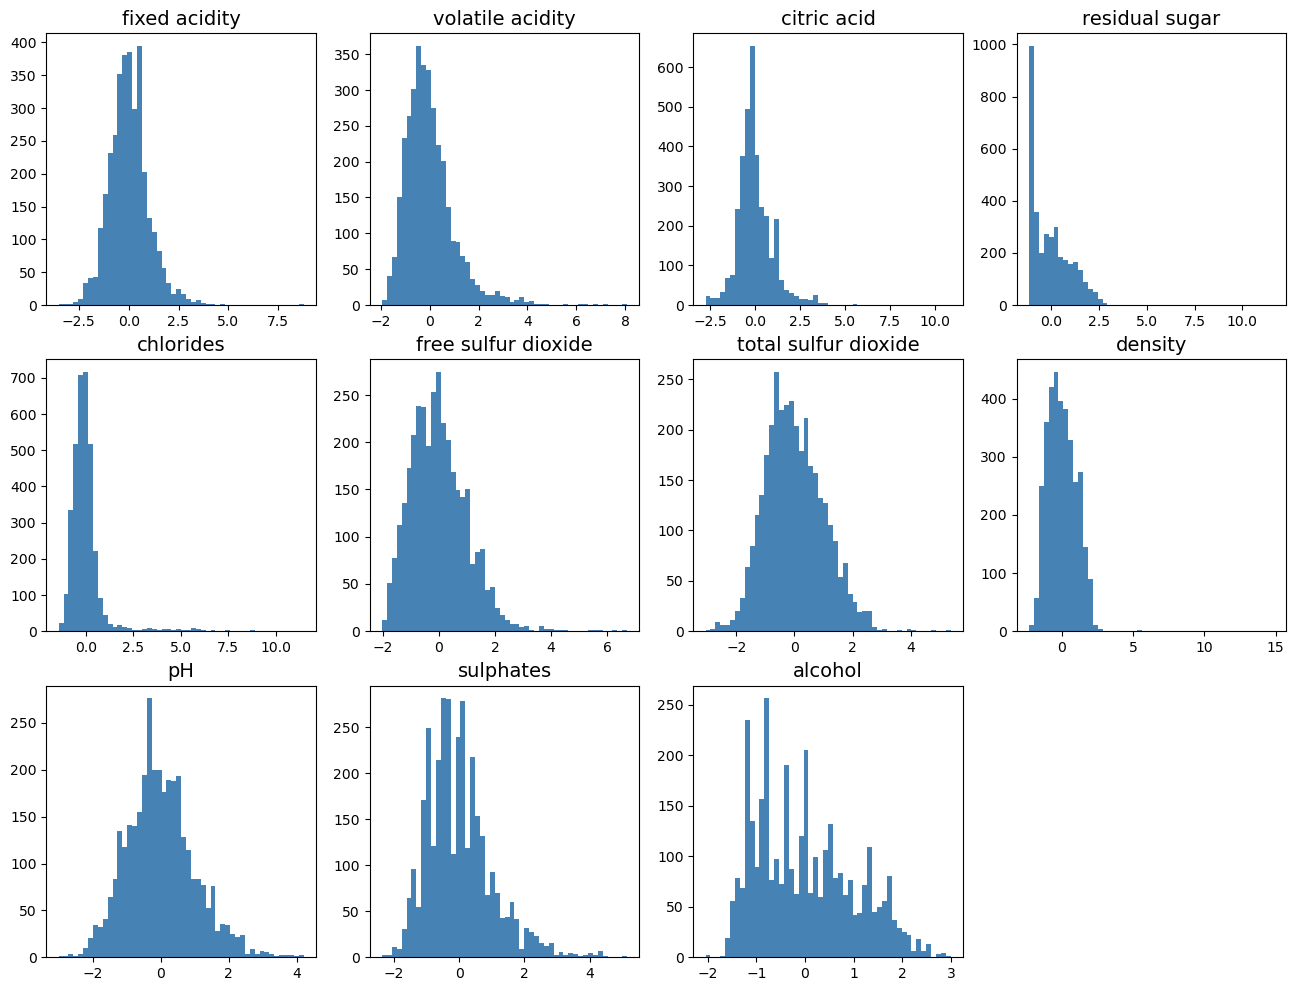

In [77]:
fig = plt.figure(figsize=(16,12))

for feat_idx in range (X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx + 1))
    h = ax.hist(X_train_std[:, feat_idx], bins =50, color= 'steelblue', edgecolor= 'none')
    ax.set_title(data.columns[feat_idx], fontsize = 14)

In [78]:
from sklearn import neighbors

In [79]:
classifier = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),
                                         {'n_neighbors':[3, 5, 7, 9, 11, 13, 15] },
                                         cv= 5, scoring='accuracy')

In [81]:
classifier.fit(X_train_std, y_train).best_params_

{'n_neighbors': 11}

In [82]:
prediction = classifier.predict(X_test_std)

In [84]:
from sklearn import metrics

In [86]:
print(metrics.accuracy_score(y_test, prediction))

0.7523809523809524
